In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

## Data gathering

**1) Pick a dataset.**

I looked at data from https://www.kaggle.com/skihikingkevin/csgo-matchmaking-damage and my analysis is inspired by the excellent work of the kaggle user shihikingkevin who put together this data set. The data set contains more than 1400 matchmaking matches (~31500 rounds) played in September 2017.

To narrow down the scope of the analysis, and to allow for the data set to stay below github's size limit, I trimmed the set down to only include data from the map de_mirage.

This topic will not be relevant or interesting for all readers, but is more focused towards people already familiar with the game. As such, the blog posts contains chargon which will seem unfamiliar to some readers, and I have assumed people who will find the post relevant have at least a pretty good understanding of the concept of the game, so this is not described in great detail.

**2) Pose at least three questions related to business or real-world applications of how the data could be used.**

- Which pistols are preffered in the pistol round?
- Which site should you attack/defend?
- Should CTs buy a defuse kit in the pistol round?

**3) Create a Jupyter Notebook or Python script, and any associated packages you'd like, to:**

*Prepare data:* DONE

*Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize* DONE

*Provide a clear connection between your business questions and how the data answers them.* DONE

**4) Communicate your business insights:**

*Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind* DONE
*Create a blog post to share your questions and insights with a non-technical audience* IN PROGRESS

## CRISP-DM
- Business understanding
- Data understanding
- Data preparation
- Modeling
- Evaluation
- Deployment

In [2]:
# Reading in the datasets
df = pd.read_csv('demos_mirage.csv', index_col=0)
map_df = pd.read_csv('map_data.csv', index_col=0)

In [3]:
df.head()

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,-359.5016,389.7257,-468.7209,529.1569,PISTOL_ROUND,4250,4200,15.0
1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,-650.1707,520.0313,-352.4009,392.1384,PISTOL_ROUND,4250,4200,15.0
2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,-650.1707,520.0313,-335.1208,401.2988,PISTOL_ROUND,4250,4200,15.0
3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,-2064.0290,793.1069,-1575.5010,685.9157,PISTOL_ROUND,4250,4200,15.0
4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,-1090.8520,677.1235,-2063.8480,793.9529,PISTOL_ROUND,4250,4200,15.0


In [145]:
print("Total Number of Rounds: %i" % df.groupby(['file', 'round'])['tick'].first().count())

Total Number of Rounds: 9209


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267436 entries, 0 to 267435
Data columns (total 32 columns):
file               267436 non-null object
map                267436 non-null object
date               267436 non-null object
round              267436 non-null int64
tick               267436 non-null int64
seconds            267436 non-null float64
att_team           267436 non-null object
vic_team           267436 non-null object
att_side           267436 non-null object
vic_side           267436 non-null object
hp_dmg             267436 non-null int64
arm_dmg            267436 non-null int64
is_bomb_planted    267436 non-null bool
bomb_site          45420 non-null object
hitbox             267436 non-null object
wp                 267436 non-null object
wp_type            267436 non-null object
award              267436 non-null int64
winner_team        267436 non-null object
winner_side        267436 non-null object
att_id             267436 non-null int64
att_rank       

In [5]:
df['is_bomb_planted'].value_counts()

False    222016
True      45420
Name: is_bomb_planted, dtype: int64

In [6]:
df['bomb_site'].value_counts()

A    24259
B    21161
Name: bomb_site, dtype: int64

In [7]:
map_df.head()

,EndX,EndY,ResX,ResY,StartX,StartY
de_cache,3752,3187,1024,1024,-2031,-2240
de_cbble,2282,3032,1024,1024,-3819,-3073
de_dust2,2127,3455,1024,1024,-2486,-1150
de_inferno,2797,3800,1024,1024,-1960,-1062
de_mirage,1912,1682,1024,1024,-3217,-3401


In [8]:
md = map_df.loc[df['map']]

In [9]:
md.head()

,EndX,EndY,ResX,ResY,StartX,StartY
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401
de_mirage,1912,1682,1024,1024,-3217,-3401


In [10]:
# Adding damage instance coordinates to map coordinates

md[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']] = (df.set_index('map')[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']])

In [11]:
md.head()

,EndX,EndY,ResX,ResY,StartX,StartY,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
de_mirage,1912,1682,1024,1024,-3217,-3401,-359.5016,389.7257,-468.7209,529.1569
de_mirage,1912,1682,1024,1024,-3217,-3401,-650.1707,520.0313,-352.4009,392.1384
de_mirage,1912,1682,1024,1024,-3217,-3401,-650.1707,520.0313,-335.1208,401.2988
de_mirage,1912,1682,1024,1024,-3217,-3401,-2064.0290,793.1069,-1575.5010,685.9157
de_mirage,1912,1682,1024,1024,-3217,-3401,-1090.8520,677.1235,-2063.8480,793.9529


In [12]:
# Converting coordinates

md['att_pos_x'] = (md['ResX']*(md['att_pos_x']-md['StartX']))/(md['EndX']-md['StartX'])
md['att_pos_y'] = (md['ResY']*(md['att_pos_y']-md['StartY']))/(md['EndY']-md['StartY'])
md['vic_pos_x'] = (md['ResX']*(md['vic_pos_x']-md['StartX']))/(md['EndX']-md['StartX'])
md['vic_pos_y'] = (md['ResY']*(md['vic_pos_y']-md['StartY']))/(md['EndY']-md['StartY'])
df[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']] = md[['att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']].values

In [91]:
df.head()

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,570.496853,763.663804,548.691324,791.753033,PISTOL_ROUND,4250,4200,15.0
1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,571.914502,764.149857,PISTOL_ROUND,4250,4200,15.0
2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,575.364457,765.995273,PISTOL_ROUND,4250,4200,15.0
3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,230.189570,844.927300,327.723723,823.333007,PISTOL_ROUND,4250,4200,15.0
4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,424.483438,821.561767,230.225706,845.097732,PISTOL_ROUND,4250,4200,15.0


In [14]:
# Creating new dataframes for pistol rounds (1st and 16th round)

avail_pistols = ['USP', 'Glock', 'P2000', 'P250', 'Tec9', 'FiveSeven', 'Deagle', 'DualBarettas', 'CZ']

df_pistol = df[(df['round'].isin([1,16])) & (df['wp'].isin(avail_pistols))]

In [15]:
rifles = ['AK47', 'M4A4', 'M4A1', 'AWP', 'UMP', 'P90', 'MP7', 'Famas', 'Mac10', 'Gallil', 'MP9',
          'SG556', 'AUG', 'Scout', 'XM1014', 'Swag7', 'Bizon', 'Nova']

df_rifle = df[(df['wp'].isin(rifles))]

In [16]:
df.wp.value_counts()

AK47            65864
M4A4            23662
M4A1            18860
UMP             15723
USP             13803
Glock           13259
Incendiary      12781
P90             11325
AWP             10758
HE               8677
MP7              8317
P250             7239
Deagle           6983
Famas            5926
Mac10            5360
FiveSeven        4852
Gallil           4035
MP9              3855
Tec9             2907
CZ               2762
SG556            2594
AUG              2556
Scout            2330
P2000            2052
Unknown          1962
XM1014           1781
Swag7            1573
Bizon            1547
Nova             1101
Knife             705
DualBarettas      434
Negev             386
Scar20            369
G3SG1             241
Molotov           210
Smoke             195
SawedOff          185
Flash             163
M249               57
Zeus               44
Decoy               3
Name: wp, dtype: int64

In [17]:
df_pistol.head()

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198370068230,16,570.496853,763.663804,548.691324,791.753033,PISTOL_ROUND,4250,4200,15.0
1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,571.914502,764.149857,PISTOL_ROUND,4250,4200,15.0
2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198115686363,16,512.465043,789.914627,575.364457,765.995273,PISTOL_ROUND,4250,4200,15.0
3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198301910020,13,230.189570,844.927300,327.723723,823.333007,PISTOL_ROUND,4250,4200,15.0
4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,424.483438,821.561767,230.225706,845.097732,PISTOL_ROUND,4250,4200,15.0


In [18]:
df_rifle.head()

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
23,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,2,14954,234.0938,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198073535347,16,446.100040,732.929783,166.178889,816.637361,ECO,5000,16250,15.0
24,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,2,15104,236.4378,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198062948330,14,293.577146,639.203262,317.123357,831.329293,ECO,5000,16250,15.0
25,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,2,15118,236.6566,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198062948330,14,291.703839,639.398473,320.748384,830.731171,ECO,5000,16250,15.0
26,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,2,15288,239.3132,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,593.130847,514.901810,402.826307,576.421325,ECO,5000,16250,15.0
27,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,2,15294,239.4070,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198152153688,16,593.312827,515.481479,402.826307,576.421325,ECO,5000,16250,15.0


### Which pistols are preferred in the pistol round?

In [54]:
# Looking at what pistols are used in the pistol rounds

# including file, round, attacking side and weapon used, sorted by damage given
pistol_used = df_pistol.groupby(['file', 'round', 'att_side', 'wp'])['hp_dmg'].first()

# Getting percentage of each weapon used by dividing each weapon used over total weapons used
(pistol_used.groupby(['wp']).count()/pistol_used.groupby(['wp']).count().sum())*100

wp
CZ               2.156722
Deagle           5.427750
DualBarettas     1.150252
FiveSeven        6.218548
Glock           26.887132
P2000           10.855500
P250             9.453630
Tec9             4.888569
USP             32.961898
Name: hp_dmg, dtype: float64

In [83]:
# Making a plot of pistol round weapon usage
mirage_pistol_dict = {'USP' : 32.96, 'Glock' : 26.89, 'P2000' : 10.86, 'P250' : 9.45, 'FiveSeven' : 6.22,
                      'Deagle' : 5.43, 'Tec9' : 4.89, 'CZ' : 2.16, 'DualBarettas' : 1.15}

df_pistol_graph = pd.DataFrame(list(mirage_pistol_dict.items()), columns=['Pistol', 'Percentage'])

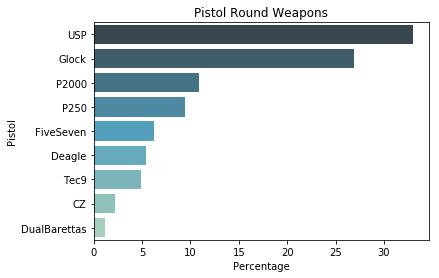

In [211]:
sns.barplot(y='Pistol', x='Percentage', data=df_pistol_graph, orient='h', palette=("GnBu_d"))
plt.title('Pistol Round Weapons')
plt.savefig('pistol_round_weapons.png')

### Which site should you attack/defend?

In [129]:
def plot_heatmap(map_played, df, file_name):
    """Function for plotting a heatmap of player positions
       at the time of damage, on a given map.
       
       INPUT:
       map_played: name of map, eg. de_train, de_mirage
       df: dataframe to be plotted, eg. df_rifle, df_pistols
       file_name: name to save file as
       
       OUTPUT:
       Heatmap of CT (left) and T (right) positions as they
       damage opponent."""
    
    map_played = map_played
    map_bg = plt.imread('./map_imgs/'+map_played+'.png')
    
    # Setting up graph
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))
    ax1.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax2.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax1.imshow(map_bg, zorder=0, extent=[0.0, 1024, 0.0, 1024])
    ax2.imshow(map_bg, zorder=0, extent=[0.0, 1024, 0.0, 1024])
    plt.xlim(0, 1024)
    plt.ylim(0, 1024)
    
    # Plotting CT side
    plot_df = df.loc[(df.map == map_played) & (df.att_side == 'CounterTerrorist')]
    sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='Blues', bw=15, ax=ax1)
    ax1.set_title('Counter-Terrorist Attacking')
    
    # Plotting T side  
    plot_df = df.loc[(df.map == map_played) & (df.att_side == 'Terrorist')]
    sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='YlOrRd', bw=15, ax=ax2)
    ax2.set_title('Terrorist Attacking')
    
    plt.savefig(file_name)
    

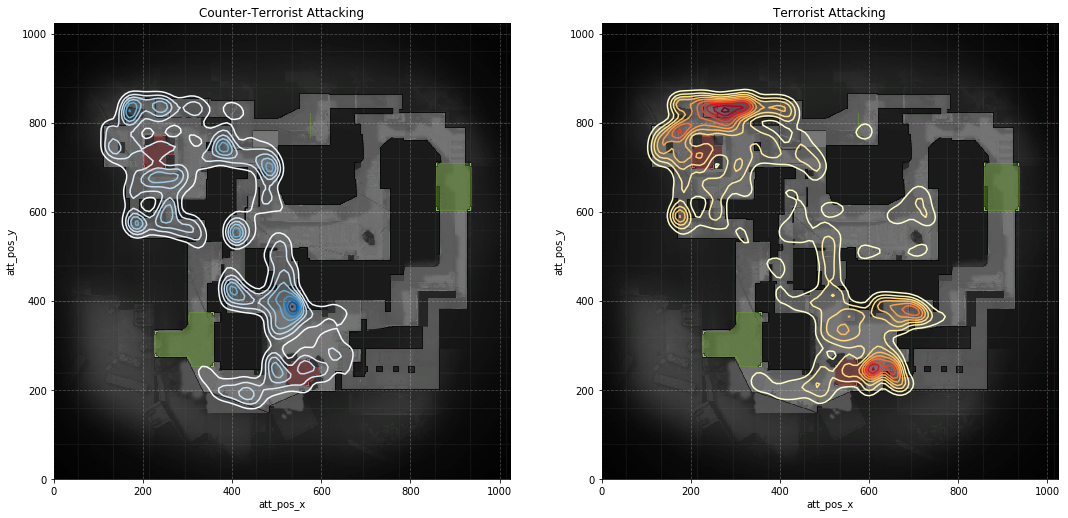

In [128]:
plot_heatmap('de_mirage', df_pistol, 'pistol_heatmap.png')

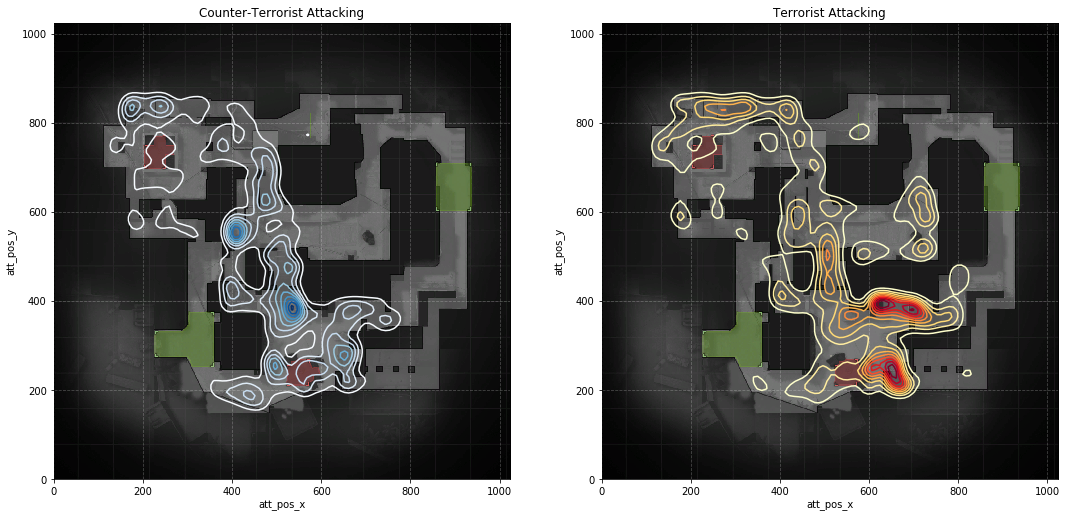

In [130]:
plot_heatmap('de_mirage', df_rifle, 'rifle_heatmap.png')

In [212]:
def plot_heatmap2(map_played, df, df2, file_name):
    """Function for plotting a heatmap of player positions
       at the time of damage, on a given map.
       
       INPUT:
       map_played: name of map, eg. de_train, de_mirage
       df: dataframe to be plotted, eg. df_rifle, df_pistols
       df2: second dataframe, here rifles/smgs
       
       OUTPUT:
       Heatmap of pistol (left) and rifle/smg (right) positions as they
       damage opponent."""
    
    map_played = map_played
    map_bg = plt.imread('./map_imgs/'+map_played+'.png')
    
    # Setting up graph
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))
    ax1.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax2.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax1.imshow(map_bg, zorder=0, extent=[0.0, 1024, 0.0, 1024])
    ax2.imshow(map_bg, zorder=0, extent=[0.0, 1024, 0.0, 1024])
    plt.xlim(0, 1024)
    plt.ylim(0, 1024)
    # cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    
    # Plotting pistols
    plot_df = df.loc[(df.map == map_played)]
    sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='GnBu_d', bw=15, ax=ax1)
    ax1.set_title('Pistol Rounds')
    ax2.set_title('Rifle / SMG rounds')
    
    # Plotting Rifle/SMGs
    plot_df = df2.loc[(df2.map == map_played)]
    sns.kdeplot(plot_df['att_pos_x'], plot_df['att_pos_y'], cmap='GnBu_d', bw=15, ax=ax2)
    
    plt.savefig(file_name)


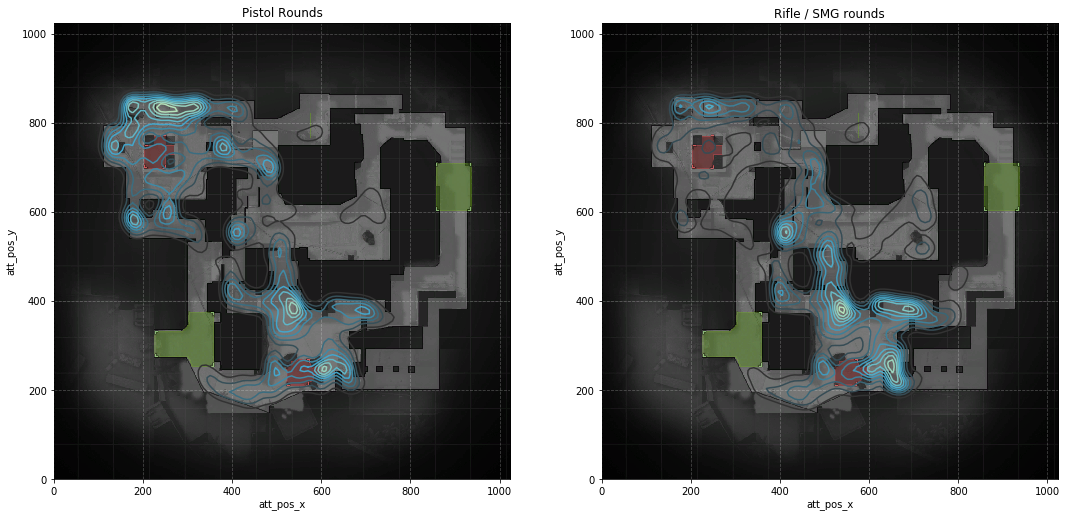

In [213]:
plot_heatmap2('de_mirage', df_pistol, df_rifle, 'combined_heatmap.png')

In [113]:
print("Bomb site plants for pistol rounds:\n")
print(df_pistol.bomb_site.value_counts())
print("\nTotal number of plants:")
print(df_pistol.bomb_site.value_counts().sum())
print("\nBomb planted on site B in 58 % of all plants.")

Bomb site plants for pistol rounds:

B    3262
A    2391
Name: bomb_site, dtype: int64

Total number of plants:
5653

Bomb planted on site B in 58 % of all plants.


In [137]:
# This is reversed for rifle rounds, where the bomb is planted on site A 53 % of the time.

df['bomb_site'].value_counts()

A    24259
B    21161
Name: bomb_site, dtype: int64

### Should CTs buy a defuse kit in the pistol rounds?

The defuse kit is only of value if the terrorists actually succeed in planting the bomb. Hence one way to approach this question is to look at successful bomb plants. 

Starting off by looking at the number of bomb plants in pistol rounds and rifle rounds. It seems bomb plants are more common (26.8 %) in the pistol rounds compared to rifle/normal rounds (16.2 %).

In [115]:
df_pistol['is_bomb_planted'].value_counts()

False    15412
True      5653
Name: is_bomb_planted, dtype: int64

In [114]:
df['is_bomb_planted'].value_counts()

False    222016
True      45420
Name: is_bomb_planted, dtype: int64

In [123]:
# Bomb plants in pistol rounds

pistol_bomb_plants = np.count_nonzero(df_pistol['is_bomb_planted'])
pistol_total_rounds = df_pistol['is_bomb_planted'].value_counts().sum()

(pistol_bomb_plants / pistol_total_rounds)*100

26.835983859482553

In [136]:
# Bomb plants in rifle rounds

rifle_bomb_plants = np.count_nonzero(df_rifle['is_bomb_planted'])
rifle_total_rounds = df_rifle['is_bomb_planted'].value_counts().sum()

(rifle_bomb_plants / rifle_total_rounds)*100

16.179668424455166

In [180]:
# Preparing graphs
pistol_is_bomb_dict = {'True' : 27, 'False' : 73}
pistol_is_bomb_graph = pd.DataFrame(list(pistol_is_bomb_dict.items()), columns=['Bomb_plant', 'Percentage'])

rifle_is_bomb_dict = {'True' : 16, 'False' : 84}
rifle_is_bomb_graph = pd.DataFrame(list(rifle_is_bomb_dict.items()), columns=['Bomb_plant', 'Percentage'])

In [205]:
def compare_plants():
    plt.figure(1, figsize=(12, 4))
    p1 = plt.subplot(121)
    sns.barplot(x='Bomb_plant', y='Percentage', data=pistol_is_bomb_graph, orient='v', palette=("GnBu_d"))
    plt.title('Bomb Plants in Pistol Round')
    p2 = plt.subplot(122, sharey=p1)
    sns.barplot(x='Bomb_plant', y='Percentage', data=rifle_is_bomb_graph, orient='v', palette=("GnBu_d"))
    plt.title('Bomb Plants in Rifle Round')
    plt.show()
    #plt.savefig('bomb_plants_true.png')

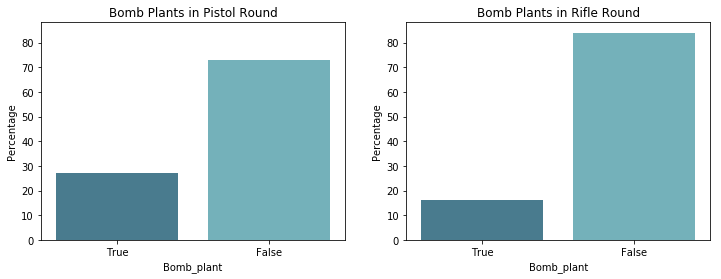

In [206]:
compare_plants()

In [183]:
# Preparing graphs site plant
pistol_site_dict = {'A' : 42, 'B' : 58}
pistol_site_graph = pd.DataFrame(list(pistol_site_dict.items()), columns=['Bomb Site', 'Percentage'])

rifle_site_dict = {'A' : 53, 'B' : 47}
rifle_site_graph = pd.DataFrame(list(rifle_site_dict.items()), columns=['Bomb Site', 'Percentage'])

In [209]:
def compare_sites():
    plt.figure(1, figsize=(12, 4))
    p1 = plt.subplot(121)
    sns.barplot(x='Bomb Site', y='Percentage', data=pistol_site_graph, orient='v',palette=("GnBu_d"))
    plt.title('Bomb Site Planted in Pistol Round')
    p2 = plt.subplot(122, sharey=p1)
    sns.barplot(x='Bomb Site', y='Percentage', data=rifle_site_graph, orient='v', palette=('GnBu_d'))
    plt.title('Bomb Site Planted in Rifle Round')
    plt.show()

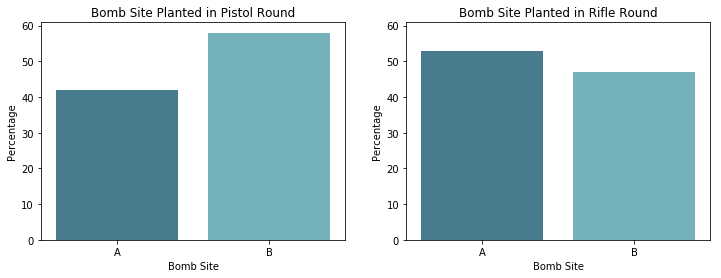

In [210]:
compare_sites()